1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

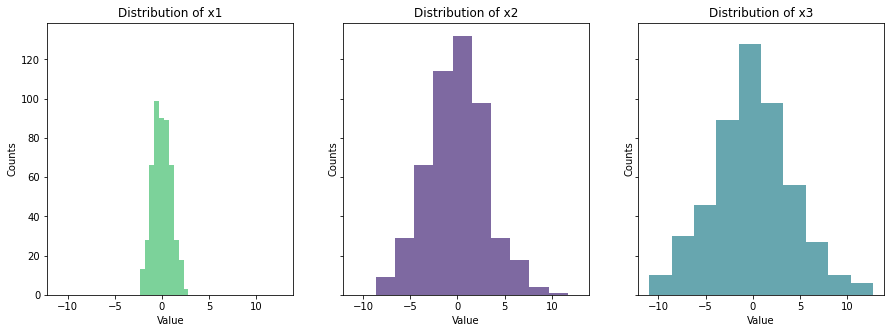

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
from mpl_toolkits.mplot3d import Axes3D

N=500
tol=1e-13 #Below this number, we set values to 0

x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1+x2

X = np.array([x1,x2,x3])

#Plotting the original histograms
fig, ax = plt.subplots(ncols=3,figsize=(15, 5), sharey=True, sharex=True)
for i,j in enumerate(['x1','x2','x3']):
    ax[i].hist(X[i], color=plt.cm.viridis(np.random.rand()), alpha=0.7)
    ax[i].set_ylabel("Counts")
    ax[i].set_title("Distribution of "+str(j))
    ax[i].set_xlabel("Value")


In [27]:
#Eigendecomposition of covariance matrix    
cov = np.cov(X)
aval, V = la.eig(cov) 
aval = np.real_if_close(aval)
aval[abs(aval)<tol]=0

print("Covariance matrix:\n", cov, '\n')
print("--- Eigendecomposition ---\nEigenvalues:\n", aval, '\n')
print("Eigenvectors:\n", V, '\n')

#Covariance matrix decomposition with SVD (dataset already centered in 0)
U, S, Vt = la.svd(X)

aval_svd = S**2/(N-1)
avet_svd = U

print("--- SVD ---\nEigenvalues:\n", aval_svd, '\n')
print("Eigenvectors:\n", avet_svd, '\n')

print("Are eingenvalue and eigenvectors from Eingendecomposition and SVD the same (within the errors)?",
      np.allclose(np.sort(aval), np.sort(aval_svd), atol=1e-1),'\t',
      np.allclose(np.sort(V), np.sort(avet_svd), atol=1e-1))

print("The principal component contains the %i%% of the variability of the full set.\nSince all the variables depend linearly from x1, the variability of the entire set is almost contained (apart from the noise introduced in x2's definition) in a single component, so 1 of the 3 direction is redondant." % (100*np.sort(aval)[-1]/cov.trace()))


Covariance matrix:
 [[ 1.07277982  1.23322617  3.37878581]
 [ 1.23322617 10.31488903 12.78134136]
 [ 3.37878581 12.78134136 19.53891299]] 

--- Eigendecomposition ---
Eigenvalues:
 [28.94827582  0.          1.97830602] 

Eigenvectors:
 [[-0.12379863 -0.81649658  0.5639213 ]
 [-0.56686109 -0.40824829 -0.71554304]
 [-0.81445835  0.40824829  0.41229956]] 

--- SVD ---
Eigenvalues:
 [2.90008939e+01 1.97922076e+00 1.57881794e-31] 

Eigenvectors:
 [[-0.12394355  0.56388947 -0.81649658]
 [-0.56667718 -0.71568869 -0.40824829]
 [-0.81456428  0.41209024  0.40824829]] 

Are eingenvalue and eigenvectors from Eingendecomposition and SVD the same (within the errors)? True 	 True
The principal component contains the 93% of the variability of the full set.
Since all the variables depend linearly from x1, the variability of the entire set is almost contained (apart from the noise introduced in x2's definition) in a single component, so 1 of the 3 direction is redondant.


In [28]:
#The new dataset and reduction 
X_diag = V.T @ X
X_diag[np.abs(X_diag)<tol]=0


variability = aval/cov.trace()
mask = np.isclose(variability,0) #Delete redondant eingenvector, to get at least 99% 
print("We can delete the column/s x2 of the latter set and still keep the full variablity of the dataset (higher than 99%%)")


We can delete the column/s x2 of the latter set and still keep the full variablity of the dataset (higher than 99%%)


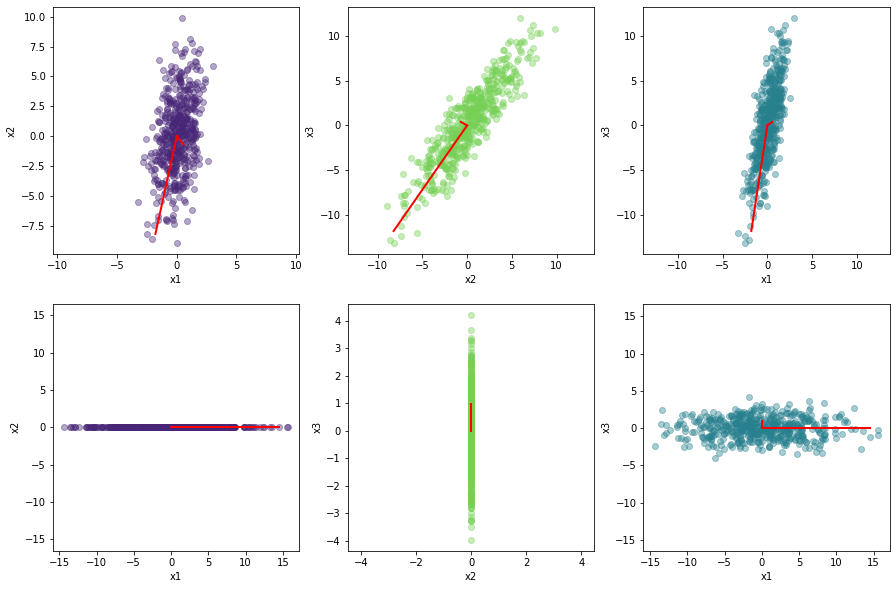

In [36]:
def plot_set(j, data, aval, V):
    s=1/2
    V[abs(V)<tol]=0 #Set zero if very low, for a better graphics
    couples=[(0,1),(1,2),(0,2)] #Couples of variables to plot
    for c,col in zip(couples,range(3)):
        ax[j,col].scatter(data[c[0]], data[c[1]], alpha=0.4,color=colors[col])
        for i in range(3): #aval plotting
            ax[j,col].plot([0, s * aval[i] * V.T[i,c[0]]],[0, s * aval[i] * V.T[i,c[1]]],'r-', lw=2)
        #Aestethics
        ax[j,col].set_xlabel("x"+str(1+c[0]))
        ax[j,col].axis('equal')
        ax[j,col].set_ylabel("x"+str(1+c[1]))
        
        
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15, 10))
colors=[plt.cm.viridis(np.random.rand()) for i in range (3)]
plot_set(0, X,aval,V)
plot_set(1, X_diag, aval, V@V.T)


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [14]:
# !!! FROM THE PREVIOUS EXERCISE !!!
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd

N=500
tol=1e-13 #Below this number, we set values to 0

x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1+x2

X = np.array([x1,x2,x3])
aval, V = la.eig(np.cov(X)) 
aval = np.real_if_close(aval)
aval[abs(aval)<tol]=0

In [16]:
var = 10
sigma = np.diag(np.random.uniform(0, 1/20, var)) #uncorrelated variable with sigma 1/20 at maximum, as request
mu = [0] * var
noise = np.random.multivariate_normal(mu, sigma, N).T #10 gaussians with random sigma

Y = np.concatenate((X, noise)) # Set + noise

#The dataset 
col = ['x'+str(i+1) for i in range(var+3)]
df = pd.DataFrame(Y.T, columns=col)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,1.384892,1.222371,3.992155,0.199475,0.094595,0.098888,-0.182023,0.084930,-0.102408,-0.139978,0.082520,0.070674,-0.168406
1,-0.661285,1.462143,0.139574,0.011558,-0.301867,-0.125669,0.129059,0.271474,-0.130510,0.020655,0.120322,0.033663,-0.126651
2,-0.542051,-5.156158,-6.240259,0.076837,-0.371941,0.261148,-0.019072,-0.014229,0.007044,0.000946,0.010380,0.008769,0.029891
3,0.870794,4.777787,6.519376,0.304321,0.244753,-0.003321,0.023169,0.095146,-0.059568,-0.044540,0.075773,-0.078230,-0.049099
4,0.427662,0.090498,0.945823,-0.110560,-0.368472,0.088016,-0.067496,-0.062558,-0.000463,0.030879,0.056905,-0.076636,-0.063189


--- Eigendecomposition of Y ---
Eigenvalues:
 [2.71e+01 1.98e+00 4.50e-02 3.04e-02 2.83e-02 0.00e+00 1.99e-02 1.89e-02
 1.45e-02 1.11e-02 6.54e-03 5.75e-03 5.25e-03] 

--- Eigendecomposition of X (original dataset)---
Eigenvalues:
 [27.11  0.    1.98] 



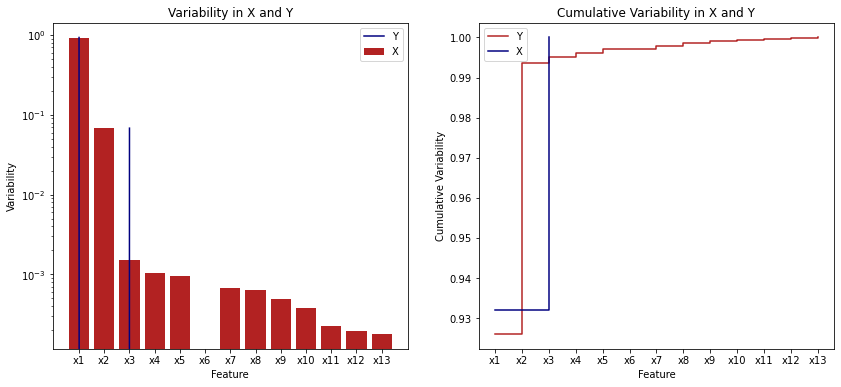

In [19]:
cov = np.cov(Y)
lY, VY = la.eig(cov) 
lY = np.real_if_close(lY)
lY[abs(lY)<tol]=0

np.set_printoptions(precision=2)
print("--- Eigendecomposition of Y ---\nEigenvalues:\n", lY, '\n')
# print("Eigenvectors:\n", VY, '\n')

print("--- Eigendecomposition of X (original dataset)---\nEigenvalues:\n", aval, '\n')
#print("Eigenvectors:\n", V, '\n')

variability = lY/cov.trace()

#Comparison variability
fig, ax = plt.subplots(ncols=2,figsize=(14, 6))
ax[1].step(col,np.cumsum(variability),where='post', c='firebrick', label='Y')
ax[1].set_ylabel("Cumulative Variability")
ax[1].set_title("Cumulative Variability in X and Y")
ax[1].set_xlabel("Feature")
ax[1].step(col[0:3],np.cumsum(aval/  (np.cov(X)).trace() ),where='post', c='navy', label='X')
ax[1].legend()

ax[0].bar(col,variability,color='firebrick', label='X')
ax[0].set_ylabel("Variability")
ax[0].set_title("Variability in X and Y")
ax[0].set_xlabel("Feature")   
ax[0].plot(col[0:3],aval/(np.cov(X)).trace() ,color='navy', label='Y')
ax[0].legend()
ax[0].set_yscale('log')



The 99.7% of the variability is achieved by reducing the set to 4 from 13 of the original features.
The variables of the new set are:  ['x1' 'x2' 'x3' 'x4']


array([[<AxesSubplot:xlabel='x1', ylabel='x1'>,
        <AxesSubplot:xlabel='x2', ylabel='x1'>,
        <AxesSubplot:xlabel='x3', ylabel='x1'>,
        <AxesSubplot:xlabel='x4', ylabel='x1'>],
       [<AxesSubplot:xlabel='x1', ylabel='x2'>,
        <AxesSubplot:xlabel='x2', ylabel='x2'>,
        <AxesSubplot:xlabel='x3', ylabel='x2'>,
        <AxesSubplot:xlabel='x4', ylabel='x2'>],
       [<AxesSubplot:xlabel='x1', ylabel='x3'>,
        <AxesSubplot:xlabel='x2', ylabel='x3'>,
        <AxesSubplot:xlabel='x3', ylabel='x3'>,
        <AxesSubplot:xlabel='x4', ylabel='x3'>],
       [<AxesSubplot:xlabel='x1', ylabel='x4'>,
        <AxesSubplot:xlabel='x2', ylabel='x4'>,
        <AxesSubplot:xlabel='x3', ylabel='x4'>,
        <AxesSubplot:xlabel='x4', ylabel='x4'>]], dtype=object)

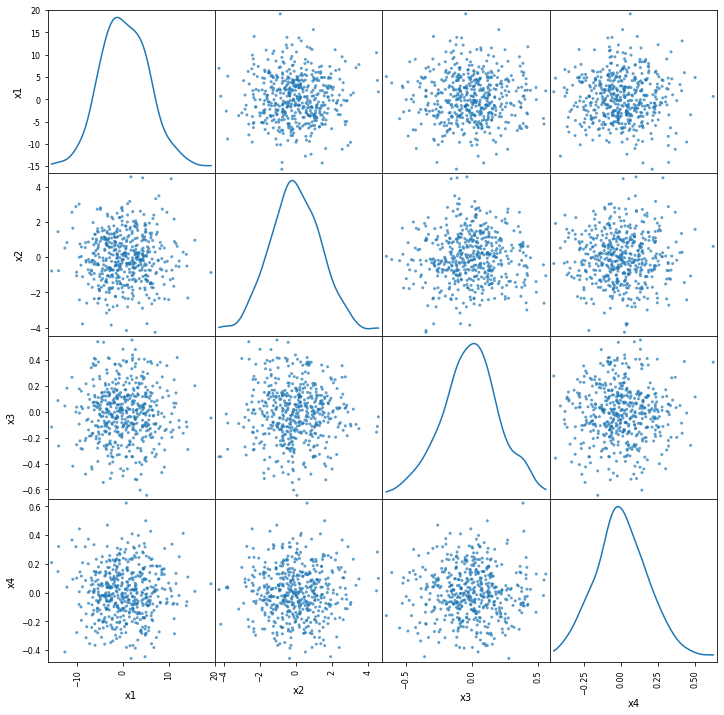

In [22]:
#This function return the index of the features for a given variability threshold, sorted by their variability
def reduce_PCA(threshold, aval, variability):
    cum_var = np.cumsum(-np.sort(-variability))
    last_index = len(cum_var[cum_var<threshold])
    cleaned_aval = (-np.sort(-aval))[0:last_index] #This one are the eingenvector to consider
    d = {aval: idx for idx, aval in enumerate(aval)}
    return [d.get(aval) for aval in cleaned_aval]

#Making the new set 
Y_diag = VY.T @ Y
Y_diag[np.abs(Y_diag)<tol]=0


threshold = 0.997
index = reduce_PCA(threshold,lY, variability)
print("The %.1f%% of the variability is achieved by reducing the set to %i from %i of the original features." %(threshold*100,len(index),len(lY)))
print("The variables of the new set are: ",np.array(col)[index])

df = pd.DataFrame(Y_diag[index].T, columns=np.array(col)[index])
df

pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(12,12),alpha=0.7,grid=True)


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [23]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/Dropbox/Università/Esami\ in\ corso/high\ level\ programming/Githb\ branch/exercises/data_ex
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/Dropbox/Università/Esami\ in\ corso/high\ level\ programming/Githb\ branch/exercises/data_ex

--2022-01-14 16:35:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘/Users/highdom/Dropbox/Università/Esami in corso/high level programming/Githb branch/exercises/data_ex/magic04.data’

magic04.data        100%[===================>]   1,41M   955KB/s    in 1,5s    

2022-01-14 16:35:13 (955 KB/s) - ‘/Users/highdom/Dropbox/Università/Esami in corso/high level programming/Githb branch/exercises/data_ex/magic04.data’ saved [1477391/1477391]

--2022-01-14 16:35:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... con

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd


col=np.array(['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha', 'fDist', 'class'])  

df=pd.read_csv("data_ex/magic04.data",header=None,names=col)

X = df.loc[:, df.columns!='class'].values.T #Removing non-numeric datas
cov = np.cov(X)
aval, V = la.eig(cov) 
aval = np.real_if_close(aval)
X_diag = V.T @ X

np.set_printoptions(precision=3)
print("--- Eigendecomposition of the dataset ---\nEigenvalues:\n", aval, '\n')
print("Eigenvectors matrix is a %s matrix" % str(V.shape))

df = pd.DataFrame(X_diag.T, columns=col[0:10])
df

--- Eigendecomposition of the dataset ---
Eigenvalues:
 [6.580e+03 3.854e+03 2.016e+03 1.327e+03 6.102e+02 4.336e+02 1.173e+02
 8.640e-02 1.074e-02 3.853e-04] 

Eigenvectors matrix is a (10, 10) matrix


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,66.770898,-55.598192,13.782929,-23.910855,48.094253,-9.214111,-2.965775,-1.988366,-1.348682,0.110405
1,174.588255,-109.891592,33.987128,7.499934,27.852709,-11.070329,0.790826,-1.645922,-1.493061,0.035337
2,243.440502,-111.280406,162.323113,-158.011234,84.034269,-48.769028,-64.164079,-1.422655,-1.420320,0.093817
3,97.933588,-58.003670,42.243997,-4.311444,20.074677,-8.227096,0.864271,-1.631393,-1.515425,0.065159
4,331.900019,-145.558113,40.844236,7.840250,39.158539,20.131992,-1.603987,-1.826953,-1.433084,0.094436
...,...,...,...,...,...,...,...,...,...,...
19015,92.565079,-56.976797,19.077462,-2.310343,13.245568,2.295051,-2.197477,-1.845665,-1.603136,0.054561
19016,201.476793,-119.750120,61.301766,11.541361,110.710890,-5.524871,9.893790,-1.761521,-1.293937,0.113235
19017,247.779335,-105.154801,10.006955,-23.135649,55.004428,-10.611179,-17.688940,-2.074503,-1.339143,0.110234
19018,396.071821,-87.969150,157.616635,-34.216568,106.826323,-67.841820,-23.584568,-2.322530,-1.430525,0.083373


The 90.0% of the variability is contained in 3 of the 10 original features.
These features are:  ['fLength' 'fWidth' 'fSize']


,fLength,fWidth,fSize
0,66.770898,-55.598192,13.782929
1,174.588255,-109.891592,33.987128
2,243.440502,-111.280406,162.323113
3,97.933588,-58.003670,42.243997
4,331.900019,-145.558113,40.844236
...,...,...,...
19015,92.565079,-56.976797,19.077462
19016,201.476793,-119.750120,61.301766
19017,247.779335,-105.154801,10.006955
19018,396.071821,-87.969150,157.616635


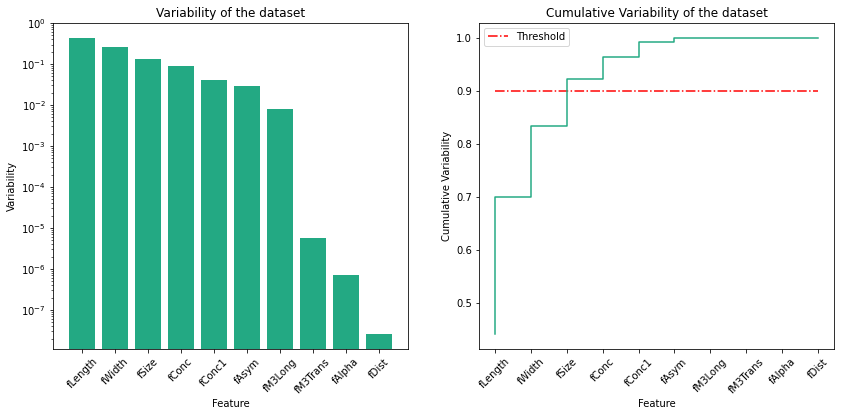

In [45]:
#Plot the trend of variability over the set
def variability(aval, cov, col, threshold):
    variability = aval/cov.trace()
    #Plot variability 
    xlabels = col 
    fig, ax = plt.subplots(ncols=2,figsize=(14, 6))
    rnd_color=plt.cm.viridis(np.random.rand())
    ax[0].bar(col,variability,color=rnd_color)
    ax[0].set_ylabel("Variability")
    ax[0].set_title("Variability of the dataset")
    ax[0].set_xlabel("Feature")   
    ax[0].set_yscale('log')
    ax[0].set_xticks(col)
    ax[0].set_xticklabels(xlabels, rotation=45)
    ax[1].step(col,np.cumsum(variability),where='pre', color=rnd_color)
    ax[1].set_ylabel("Cumulative Variability")
    ax[1].set_title("Cumulative Variability of the dataset")
    ax[1].set_xlabel("Feature")
    ax[1].set_xticks(col)
    ax[1].set_xticklabels(xlabels, rotation=45)
    ax[1].hlines(threshold,0,len(col)-1, linestyles='dashdot', color='red', label='Threshold')
    ax[1].legend()
    return variability

# returns the index of the features for a given variability threshold, sorted by their variability
def reduce_PCA(threshold, aval, variability):
    cum_var = np.cumsum(-np.sort(-variability))
    last_index = len(cum_var[cum_var<threshold])
    cleaned_aval = (-np.sort(-aval))[0:last_index] #This one are the eingenvector to consider
    d = {aval: idx for idx, aval in enumerate(aval)}
    return [d.get(aval) for aval in cleaned_aval]


threshold=0.90
variability = variability(aval, cov, col[0:10],threshold)

index = reduce_PCA(threshold,aval, variability)

print("The %.1f%% of the variability is contained in %i of the %i original features." %(threshold*100,len(index),len(aval)))
print("These features are: ",col[index])

df = pd.DataFrame(X_diag[index].T, columns=col[index])
df



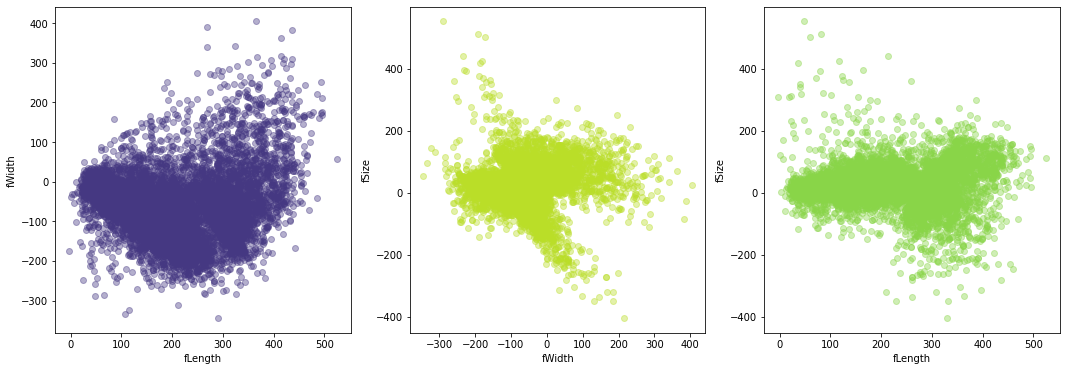

In [34]:
def plot_set(data):
    couples=[(0,1),(1,2),(0,2)] #Couples of variables to plot
    for c,cc in zip(couples,range(3)):
        ax[cc].scatter(data[c[0]], data[c[1]], alpha=0.4,color=colors[cc])
        #Aestethics
        ax[cc].set_xlabel(col[c[0]])
        ax[cc].set_ylabel(col[c[1]])
        
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18, 6))
colors=[plt.cm.viridis(np.random.rand()) for i in range(3)]
plot_set(X_diag[index])

